In [1]:
import pathlib
import pandas as pd
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
file = pathlib.Path(".") / "submission.csv"
df = pd.read_csv(file)
df

,Id,Predicted
0,1,4222 1376 10552 1376 16882 1376 23212 1376 295...
1,2,1067 892 2313 2851 10573 892 11819 2851 20079 ...
2,3,2829 1279 8078 1279 13327 1279 18576 1279 2382...


In [3]:
kind = "train"
index = "1"
id_loc = 0
img = cv2.imread((pathlib.Path(".") / kind / index / "mask.png").as_posix(), 0)
img.shape

(8181, 6330)

In [4]:
out_img = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)
predicted = df["Predicted"].loc[id_loc]
predicted = list(map(int, predicted.split(" ")))
starts = []
for i in range(0, len(predicted), 2):
    starts.append(i)
    start = predicted[i]
    count = predicted[i + 1]
    x1 = start % img.shape[1]
    y1 = start // img.shape[1]
    # print("start, x1, y1 ", start, x1, y1)
    for i in range(count):
        assert out_img[y1, x1, 0] == 0
        out_img[y1, x1, 0] = 255
        x1 += 1
        if x1 == img.shape[1]:
            y1 += 1
            x1 = 0

assert starts == sorted(starts)

out_img.shape, np.min(out_img), np.max(out_img)

((8181, 6330, 1), 0, 255)

In [5]:
out_img.shape

(8181, 6330, 1)

In [6]:
np.where(out_img[:, :, 0] > 0)[0]

array([   0,    0,    0, ..., 8148, 8148, 8148])

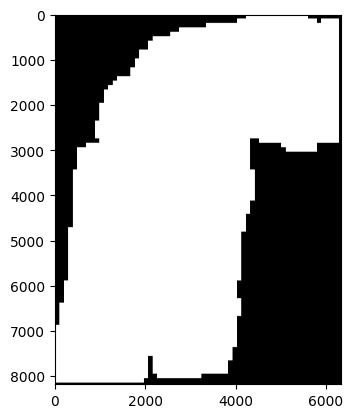

In [7]:
plt.imshow(out_img[:, :, 0], cmap="gray")